In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from imblearn.under_sampling import CondensedNearestNeighbour,EditedNearestNeighbours,TomekLinks,NearMiss
from imblearn.under_sampling import OneSidedSelection, NeighbourhoodCleaningRule, RandomUnderSampler, InstanceHardnessThreshold, AllKNN
from matplotlib import pyplot
# from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC 
from imblearn import under_sampling
from typing import Counter
from sklearn.metrics import classification_report
%matplotlib inline


In [4]:
# Surpress warnings:
# import warnings
# def warn(*args, **kwargs):
#     pass
# warnings.warn = warn

In [5]:
def plot_confusion_matrix(y, y_predict, t='Confusion Matrix',cm=None):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix
    if cm is None:
        cm = confusion_matrix(y, y_predict)
    fig, ax = plt.subplots(figsize=(4, 3))
    sns.heatmap(cm, annot=True, ax=ax, cmap='mako', fmt=',d').set_title(
        t, fontsize=12)
    # sns.color_palette("mako", as_cmap=True)
    ax.set_xlabel('Predicted labels', fontsize=10)
    ax.set_ylabel('True labels', fontsize=10)
    # ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['BENIGN', 'MALIGNANT'], fontsize=8)
    ax.yaxis.set_ticklabels(['BENIGN', 'MALIGNANT'], fontsize=8)
    plt.show()

In [6]:
from sklearn.metrics import roc_curve, auc
def plot_roc_curve(true_y, y_prob):
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')


In [7]:
df = pd.read_csv('train40Features.csv')
target = pd.read_csv('train.csv')

In [8]:
#adding target column to our train dataset
df['target'] = target['target']

In [9]:
df.drop('V1',axis = 1, inplace = True) 

In [10]:
columns = ['sex','age','anatomy','V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8','V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34','V35','V36','target']
df.columns = columns
# df.head()

In [11]:
df['target'].value_counts()

target
0    32542
1      584
Name: count, dtype: int64

<h1> Undersampling Techniques </h1>

In [12]:
x = {}
y = {} 
x_train = {} 
x_test = {} 
y_train = {} 
y_test = {}

In [115]:
# define the undersampling method
undersample = EditedNearestNeighbours(n_neighbors=365)
x['ENN'], y['ENN'] = undersample.fit_resample(df.drop('target',axis=1),df['target'])
y_under = pd.DataFrame(y['ENN'])
x_train['ENN'], x_test['ENN'], y_train['ENN'], y_test['ENN'] = train_test_split(x['ENN'], y['ENN'], 
                                                                                test_size=0.25, random_state=4)
print(y_train['ENN'].value_counts(),'\n',y_test['ENN'].value_counts())
st_x= StandardScaler()    
x_train['ENN']= st_x.fit_transform(x_train['ENN'])    
x_test['ENN']= st_x.transform(x_test['ENN']) 

target
0    1829
1     452
Name: count, dtype: int64 
 target
0    629
1    132
Name: count, dtype: int64


In [84]:
# # define the undersampling method
# undersample = TomekLinks(sampling_strategy='auto')
# # undersample.sampling_strategy_={0:2000, 1:584}
# # print(TomekLinks.set_params(sampling_strategy_= 'auto'))
# x['TL'], y['TL'] = undersample.fit_resample(df.drop('target',axis=1),df['target'])
# #splitting dataset into training and testing sets
# x_train['TL'], x_test['TL'], y_train['TL'], y_test['TL'] = train_test_split(x['TL'], y['TL'], 
#                                                                                 test_size=0.25, random_state=4)
# print(y_train['TL'].value_counts(),'\n',y_test['TL'].value_counts())
# #normalizing the data
# x_train['TL']= st_x.fit_transform(x_train['TL'])    
# x_test['TL']= st_x.transform(x_test['TL']) 

In [116]:
from imblearn.under_sampling import AllKNN
undersample= AllKNN(n_jobs=-1, n_neighbors=85)
x['AKNN'], y['AKNN'] = undersample.fit_resample(df.drop('target',axis=1),df['target'])
x_train['AKNN'], x_test['AKNN'], y_train['AKNN'], y_test['AKNN'] = train_test_split(x['AKNN'], y['AKNN'], test_size=0.25, random_state=42)
print(y_train['AKNN'].value_counts(),'\n',y_test['AKNN'].value_counts())
st_x= StandardScaler()
x_train['AKNN']= st_x.fit_transform(x_train['AKNN'])
x_test['AKNN']= st_x.transform(x_test['AKNN'])

target
0    4478
1     444
Name: count, dtype: int64 
 target
0    1501
1     140
Name: count, dtype: int64


In [86]:
# undersample= OneSidedSelection(n_neighbors=20, n_seeds_S=1000)
# x['OSS'], y['OSS'] = undersample.fit_resample(df.drop('target',axis=1),df['target'])
# x_train['OSS'], x_test['OSS'], y_train['OSS'], y_test['OSS'] = train_test_split(x['OSS'], y['OSS'], test_size=0.25, random_state=42)
# print(y_train['OSS'].value_counts(),'\n',y_test['OSS'].value_counts())
# st_x= StandardScaler()
# x_train['OSS']= st_x.fit_transform(x_train['OSS'])
# x_test['OSS']= st_x.transform(x_test['OSS'])
#removed this, low accuracy

target
0    3136
1     434
Name: count, dtype: int64 
 target
0    1041
1     150
Name: count, dtype: int64


In [117]:
undersample = NearMiss(version=1, sampling_strategy={0:2000, 1:584})
x['NM'], y['NM'] = undersample.fit_resample(df.drop('target',axis=1),df['target'])
x_train['NM'], x_test['NM'], y_train['NM'], y_test['NM'] = train_test_split(x['NM'], y['NM'], test_size=0.25, random_state=42)
print(y_train['NM'].value_counts(),'\n',y_test['NM'].value_counts())
st_x= StandardScaler()    
x_train['NM']= st_x.fit_transform(x_train['NM'])    
x_test['NM']= st_x.transform(x_test['NM']) 

target
0    1506
1     432
Name: count, dtype: int64 
 target
0    494
1    152
Name: count, dtype: int64


In [149]:
undersample= InstanceHardnessThreshold(sampling_strategy='auto', estimator=DecisionTreeClassifier(max_depth=5))
x['IHT'], y['IHT']= undersample.fit_resample(df.drop('target',axis=1),df['target'])
x_train['IHT'], x_test['IHT'], y_train['IHT'], y_test['IHT'] = train_test_split(x['IHT'], y['IHT'], test_size=0.25, random_state=42)
print(y_train['IHT'].value_counts(),'\n',y_test['IHT'].value_counts())
st_x= StandardScaler()
x_train['IHT']= st_x.fit_transform(x_train['IHT'])
x_test['IHT']= st_x.transform(x_test['IHT'])

target
0    2107
1     440
Name: count, dtype: int64 
 target
0    705
1    144
Name: count, dtype: int64


In [118]:
# x_train['NM'].std(axis=0)


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.])

In [ ]:
undersample= TomekLinks(sampling_strategy='auto')
x['TL'], y['TL']= undersample.fit_resample(df.drop('target',axis=1),df['target'])
x_train['TL'], x_test['TL'], y_train['TL'], y_test['TL'] = train_test_split(x['TL'], y['TL'], test_size=0.25, random_state=42)


In [119]:
# # define the undersampling method
# undersample = ClusterCentroids(sampling_strategy='auto')
# # transform the dataset
# x['CC'], y['CC'] = undersample.fit_resample(df.drop('target',axis=1),df['target'])
# #converting label to dataframe
# y_under = pd.DataFrame(y['CC'])
# #splitting dataset into training and testing sets
# x_train['CC'], x_test['CC'], y_train['CC'], y_test['CC'] = train_test_split(x['CC'], y['CC'], 
#                                                                                 test_size=0.25, random_state=4)
# #finding the split of label values in the training and testing sets
# print(y_train['CC'].value_counts(),'\n',y_test['CC'].value_counts())
# #normalizing the data
# st_x= StandardScaler()    
# x_train['CC']= st_x.fit_transform(x_train['CC'])    
# x_test['CC']= st_x.transform(x_test['CC']) 

In [120]:
from imblearn import under_sampling
rus = under_sampling.RandomUnderSampler(
    sampling_strategy={0:2000, 1:584})
x['RUS'], y['RUS']= rus.fit_resample(df.drop('target',axis=1),df['target'])
x_train['RUS'], x_test['RUS'], y_train['RUS'], y_test['RUS'] = train_test_split(x['RUS'], y['RUS'],
                                                                            test_size=0.25, random_state=4)
x_train['RUS'] = st_x.fit_transform(x_train['RUS'])
x_test['RUS'] = st_x.transform(x_test['RUS'])
print(Counter(y_train['RUS']), '\n', Counter(y_test['RUS']))


Counter({0: 1502, 1: 436}) 
 Counter({0: 498, 1: 148})


In [150]:
ust = ['ENN', 'NM', 'RUS', 'IHT', 'AKNN']
for i in ust:
    print(i, x_train[i].shape, x_test[i].shape, y_train[i].shape, y_test[i].shape)
    print(Counter(y_train[i]), Counter(y_test[i]), "\n\n")
    # y_test['TL'].shape


ENN (2281, 39) (761, 39) (2281,) (761,)
Counter({0: 1829, 1: 452}) Counter({0: 629, 1: 132}) 


NM (1938, 39) (646, 39) (1938,) (646,)
Counter({0: 1506, 1: 432}) Counter({0: 494, 1: 152}) 


RUS (1938, 39) (646, 39) (1938,) (646,)
Counter({0: 1502, 1: 436}) Counter({0: 498, 1: 148}) 


IHT (2547, 39) (849, 39) (2547,) (849,)
Counter({0: 2107, 1: 440}) Counter({0: 705, 1: 144}) 


AKNN (4922, 39) (1641, 39) (4922,) (1641,)
Counter({0: 4478, 1: 444}) Counter({0: 1501, 1: 140}) 




In [151]:
def report(yt, y_pred):
    d={"Accuracy": accuracy_score(yt, y_pred),
        "Precision": precision_score(yt, y_pred),
        "Recall": recall_score(yt, y_pred),
        "F1 score":f1_score(yt, y_pred)}
    rep= pd.DataFrame(d, index=[0])
    print(rep)
    return rep
    

In [152]:
# x_train['RUS'].mean(axis=0)

In [153]:
from sklearn.linear_model import LogisticRegression
cmm = []
clf = LogisticRegression()
for i in ust:
    clf = clf.fit(x_train[i], y_train[i])
    y_pred = clf.predict(x_test[i])
    cmm.append(confusion_matrix(y_test[i], y_pred))
    # print(confusion_matrix(y_test[i], y_pred))
    print(i+" Undersampling :")
    report(y_test[i], y_pred)
    print("\n")


ENN Undersampling :
   Accuracy  Precision    Recall  F1 score
0  0.955322   0.915254  0.818182     0.864


NM Undersampling :
   Accuracy  Precision    Recall  F1 score
0  0.876161   0.839623  0.585526  0.689922


RUS Undersampling :
   Accuracy  Precision    Recall  F1 score
0  0.783282       0.58  0.195946  0.292929


IHT Undersampling :


c:\Users\priya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\priya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

   Accuracy  Precision    Recall  F1 score
0  0.935218   0.880342  0.715278  0.789272


AKNN Undersampling :
   Accuracy  Precision    Recall  F1 score
0  0.973796   0.936937  0.742857  0.828685




c:\Users\priya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


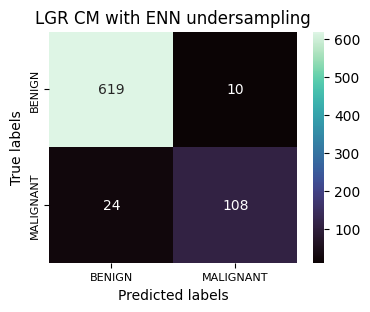

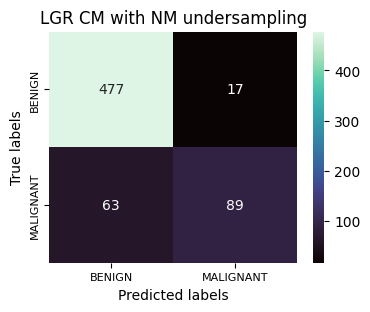

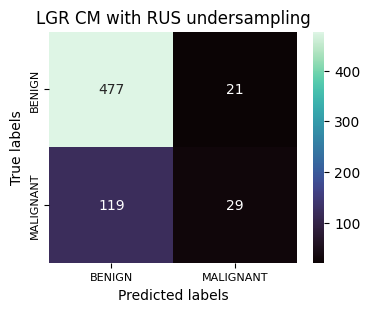

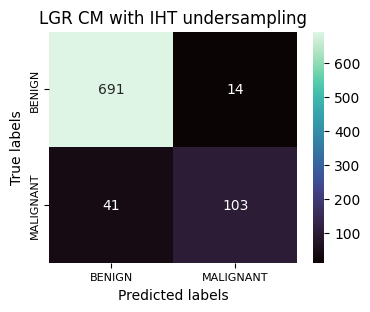

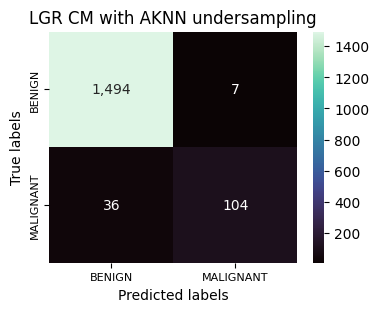

In [154]:
for n, i in enumerate(cmm):
    plot_confusion_matrix(0, 0, t=f'LGR CM with {ust[n]} undersampling', cm=i)


<h1> Decision Tree Model </h1>

In [155]:
cmm=[]
clf = DecisionTreeClassifier()
for i in ust:
    clf = clf.fit(x_train[i],y_train[i])
    y_pred = clf.predict(x_test[i])
    cmm.append(confusion_matrix(y_test[i],y_pred))
    # print(confusion_matrix(y_test[i],y_pred))
    print(i+" Undersampling :")
    report(y_test[i], y_pred)
    # print("Accuracy:", accuracy_score(y_test[i], y_pred))
    # print("Precision:", precision_score(y_test[i], y_pred))
    # print("Recall:", recall_score(y_test[i], y_pred))
    # print("F1 score:", f1_score(y_test[i], y_pred))
    # print(clf.score(x_test[i],y_test[i]))
    print("\n")
# print(cmm)


ENN Undersampling :
   Accuracy  Precision    Recall  F1 score
0  0.954008   0.854015  0.886364  0.869888


NM Undersampling :
   Accuracy  Precision    Recall  F1 score
0  0.831269   0.654676  0.598684   0.62543


RUS Undersampling :
   Accuracy  Precision    Recall  F1 score
0  0.656347   0.271605  0.297297  0.283871


IHT Undersampling :
   Accuracy  Precision    Recall  F1 score
0  0.942285   0.798742  0.881944  0.838284


AKNN Undersampling :
   Accuracy  Precision    Recall  F1 score
0  0.973796   0.825503  0.878571  0.851211




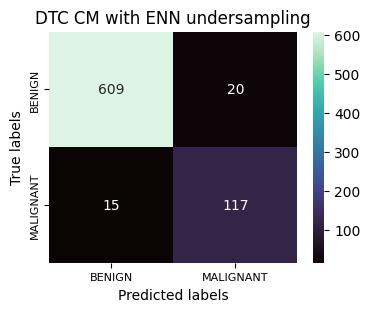

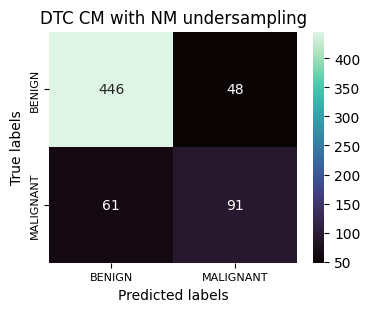

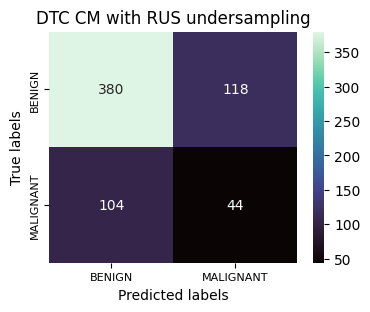

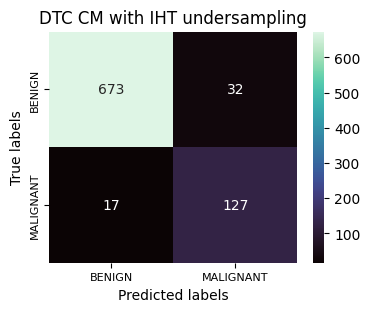

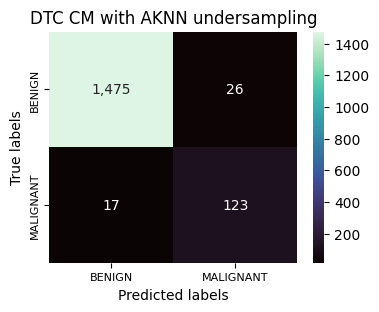

In [156]:
for n, i in enumerate(cmm):
    plot_confusion_matrix(0, 0, t=f'DTC CM with {ust[n]} undersampling', cm=i)


<h1> KNeighbors Classifier <hq>

In [157]:
from sklearn.neighbors import KNeighborsClassifier 
clf = KNeighborsClassifier(n_neighbors=6)
cmm=[]
for i in ust:
    clf = clf.fit(x_train[i],y_train[i])
    y_pred = clf.predict(x_test[i])
    cmm.append(confusion_matrix(y_test[i],y_pred))
    print(i+" Undersampling :")
    report(y_test[i], y_pred)
    print("\n\n")

ENN Undersampling :
   Accuracy  Precision    Recall  F1 score
0  0.948752   0.951456  0.742424  0.834043



NM Undersampling :
   Accuracy  Precision    Recall  F1 score
0  0.869969      0.925  0.486842  0.637931



RUS Undersampling :
   Accuracy  Precision    Recall  F1 score
0  0.764706   0.447368  0.114865  0.182796



IHT Undersampling :
   Accuracy  Precision    Recall  F1 score
0  0.936396   0.924528  0.680556     0.784



AKNN Undersampling :
   Accuracy  Precision    Recall  F1 score
0  0.975015   0.962617  0.735714  0.834008





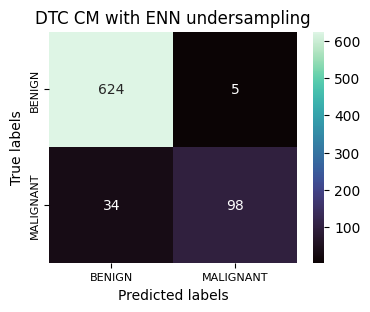

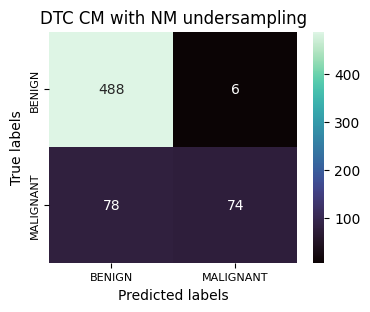

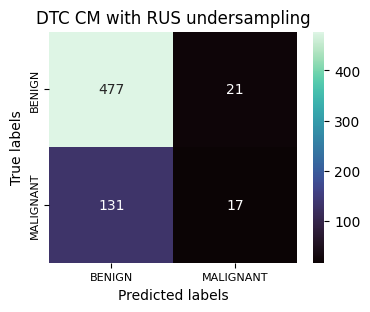

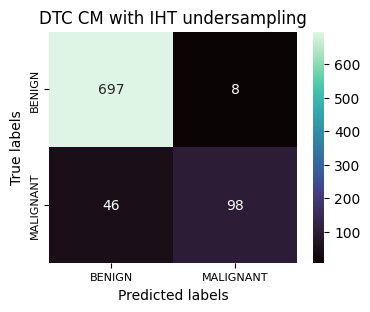

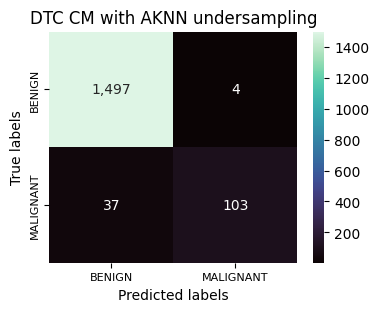

In [158]:
for n, i in enumerate(cmm):
    plot_confusion_matrix(0, 0, t=f'DTC CM with {ust[n]} undersampling', cm=i)


In [159]:
cmm=[]
clf= SVC()
for i in ust:
    clf = clf.fit(x_train[i], y_train[i])
    y_pred = clf.predict(x_test[i])
    cmm.append(confusion_matrix(y_test[i], y_pred))
    # print(confusion_matrix(y_test[i], y_pred))
    print(i+" Undersampling :")
    report(y_test[i], y_pred)
    print("\n")


ENN Undersampling :
   Accuracy  Precision    Recall  F1 score
0  0.956636   0.902439  0.840909  0.870588


NM Undersampling :
   Accuracy  Precision    Recall  F1 score
0  0.890093    0.90099  0.598684  0.719368


RUS Undersampling :
   Accuracy  Precision    Recall  F1 score
0  0.766254   0.421053  0.054054  0.095808


IHT Undersampling :
   Accuracy  Precision    Recall  F1 score
0  0.951708   0.918699  0.784722  0.846442


AKNN Undersampling :
   Accuracy  Precision  Recall  F1 score
0  0.978062   0.933333     0.8  0.861538




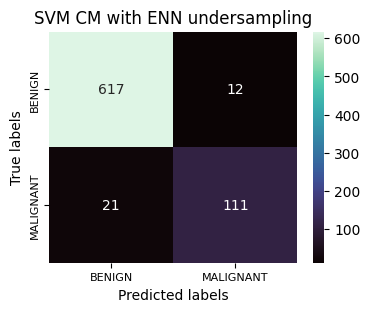

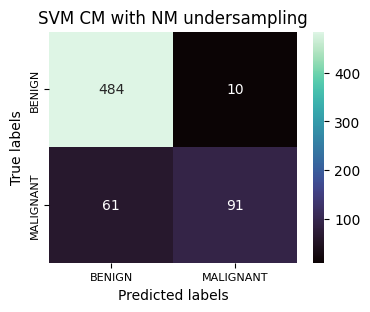

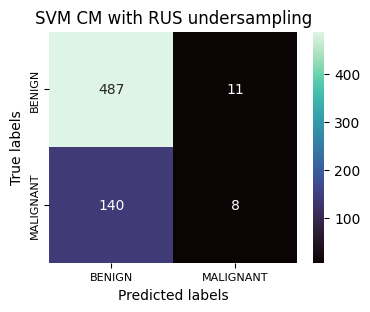

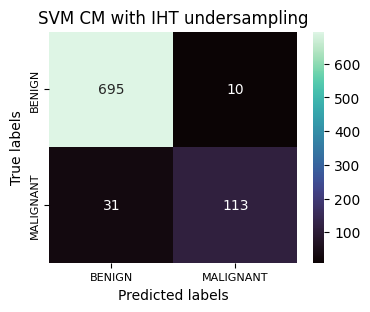

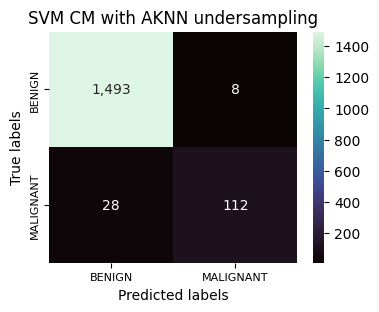

In [160]:
for n, i in enumerate(cmm):
    plot_confusion_matrix(0, 0, t=f'SVM CM with {ust[n]} undersampling', cm=i)

In [161]:
from sklearn.ensemble import RandomForestClassifier
cmm=[]
for i in ust:
    clf= RandomForestClassifier()
    clf=clf.fit(x_train[i], y_train[i])
    y_pred = clf.predict(x_test[i])
    cmm.append(confusion_matrix(y_test[i], y_pred))
    # print(confusion_matrix(y_test[i], y_pred))
    print(i+" Undersampling :")
    report(y_test[i], y_pred)
    print("\n")
    

ENN Undersampling :
   Accuracy  Precision    Recall  F1 score
0  0.972405      0.944  0.893939  0.918288


NM Undersampling :
   Accuracy  Precision    Recall  F1 score
0  0.891641   0.859649  0.644737  0.736842


RUS Undersampling :
   Accuracy  Precision    Recall  F1 score
0   0.78483   0.588235  0.202703  0.301508


IHT Undersampling :
   Accuracy  Precision  Recall  F1 score
0  0.965842   0.919708   0.875  0.896797


AKNN Undersampling :
   Accuracy  Precision    Recall  F1 score
0  0.985984      0.968  0.864286  0.913208




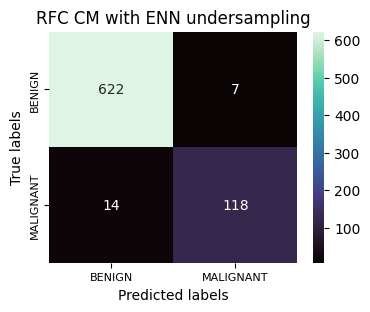

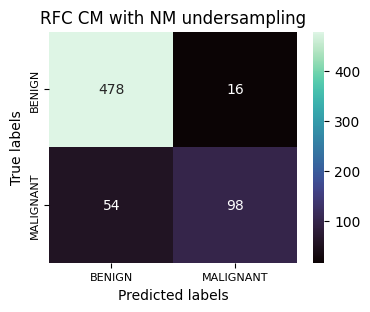

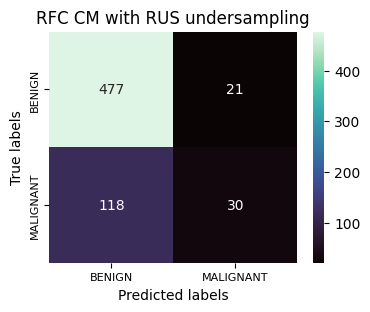

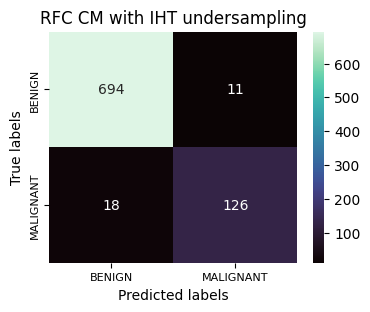

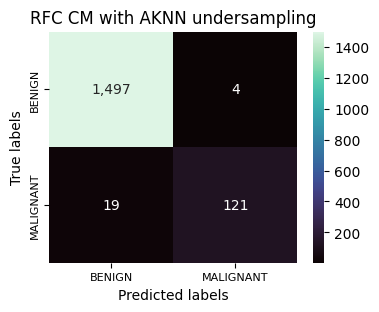

In [162]:
for n, i in enumerate(cmm):
    plot_confusion_matrix(0, 0, t=f'RFC CM with {ust[n]} undersampling', cm=i)
    

In [163]:
from xgboost import XGBClassifier
cmm=[]
for i in ust:
    clf = XGBClassifier()
    clf = clf.fit(x_train[i], y_train[i])
    y_pred = clf.predict(x_test[i])
    cmm.append(confusion_matrix(y_test[i], y_pred))
    # print(confusion_matrix(y_test[i], y_pred))
    print(i+" Undersampling :")
    report(y_test[i], y_pred)
    print("\n")


ENN Undersampling :
   Accuracy  Precision    Recall  F1 score
0  0.980289      0.968  0.916667  0.941634


NM Undersampling :
   Accuracy  Precision    Recall  F1 score
0  0.896285   0.863248  0.664474  0.750929


RUS Undersampling :
   Accuracy  Precision    Recall  F1 score
0   0.77709   0.523256  0.304054  0.384615


IHT Undersampling :
   Accuracy  Precision    Recall  F1 score
0  0.963486   0.937984  0.840278  0.886447


AKNN Undersampling :
   Accuracy  Precision    Recall  F1 score
0  0.986594   0.983607  0.857143  0.916031




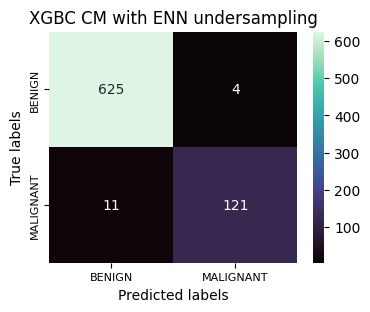

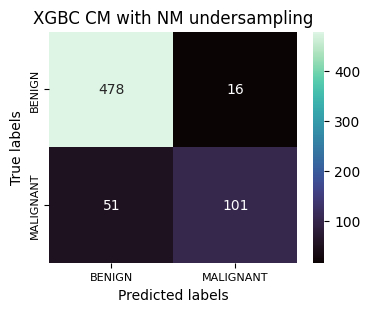

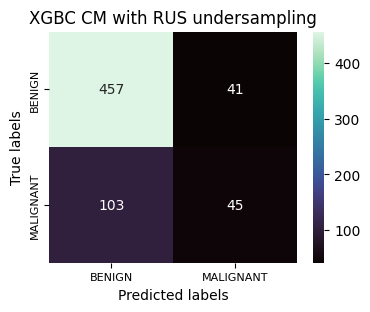

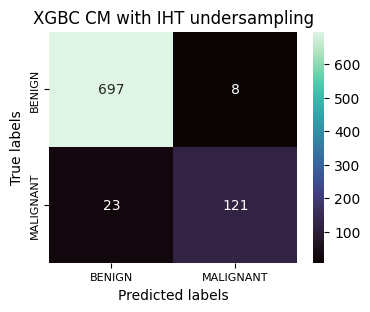

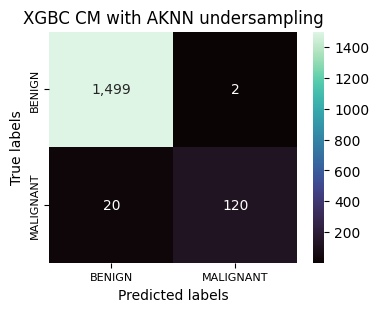

In [164]:
for n, i in enumerate(cmm):
    plot_confusion_matrix(0, 0, t=f'XGBC CM with {ust[n]} undersampling', cm=i)


In [165]:
from lightgbm import LGBMClassifier
cmm=[]
clf = LGBMClassifier(learning_rate=0.3, n_estimators=100, num_leaves=100, random_state=42)

for i in ust:
    clf = clf.fit(x_train[i], y_train[i])
    y_pred = clf.predict(x_test[i])
    cmm.append(confusion_matrix(y_test[i], y_pred))
    # print(confusion_matrix(y_test[i], y_pred))
    print(i+" Undersampling :")
    report(y_test[i], y_pred)
    print("\n")


ENN Undersampling :
   Accuracy  Precision    Recall  F1 score
0  0.980289    0.97561  0.909091  0.941176


NM Undersampling :
   Accuracy  Precision    Recall  F1 score
0  0.900929   0.872881  0.677632  0.762963


RUS Undersampling :
   Accuracy  Precision    Recall  F1 score
0   0.76935   0.493671  0.263514  0.343612


IHT Undersampling :
   Accuracy  Precision    Recall  F1 score
0   0.96702   0.932836  0.868056  0.899281


AKNN Undersampling :
   Accuracy  Precision    Recall  F1 score
0  0.987203   0.968504  0.878571  0.921348




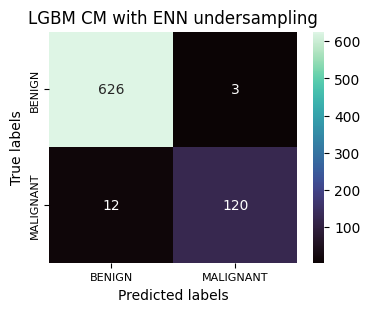

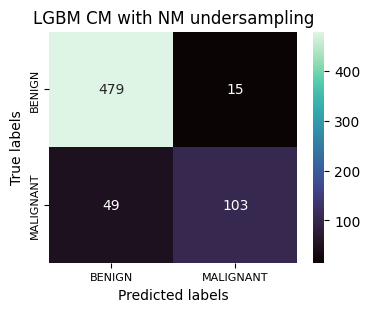

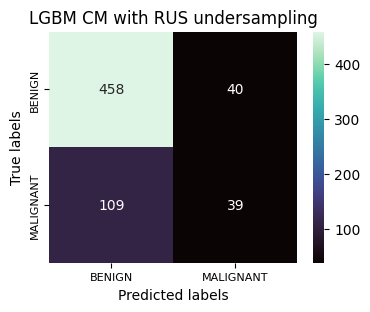

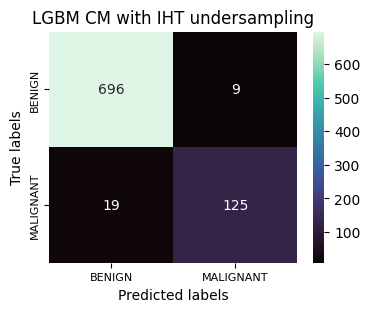

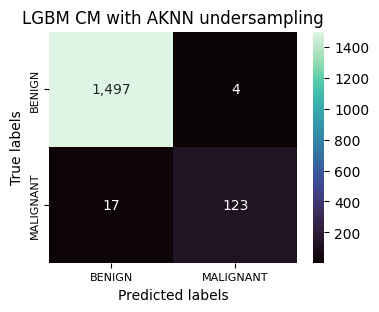

In [166]:
for n, i in enumerate(cmm):
    plot_confusion_matrix(0, 0, t=f'LGBM CM with {ust[n]} undersampling', cm=i)


In [167]:
from sklearn.ensemble import AdaBoostClassifier
cmm = []
clf = AdaBoostClassifier(n_estimators=100, random_state=0)

for i in ust:
    clf = clf.fit(x_train[i], y_train[i])
    y_pred = clf.predict(x_test[i])
    cmm.append(confusion_matrix(y_test[i], y_pred))
    # print(confusion_matrix(y_test[i], y_pred))
    print(i+" Undersampling :")
    report(y_test[i], y_pred)
    print("\n")


[[623   6]
 [ 15 117]]
ENN Undersampling :
   Accuracy  Precision    Recall  F1 score
0  0.972405    0.95122  0.886364  0.917647


[[477  17]
 [ 55  97]]
NM Undersampling :
   Accuracy  Precision    Recall  F1 score
0  0.888545   0.850877  0.638158  0.729323


[[457  41]
 [109  39]]
RUS Undersampling :
   Accuracy  Precision    Recall  F1 score
0  0.767802     0.4875  0.263514  0.342105


[[696   9]
 [ 29 115]]
IHT Undersampling :
   Accuracy  Precision    Recall  F1 score
0  0.955241   0.927419  0.798611  0.858209


[[1492    9]
 [  17  123]]
AKNN Undersampling :
   Accuracy  Precision    Recall  F1 score
0  0.984156   0.931818  0.878571  0.904412




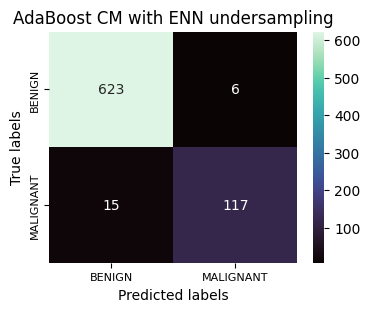

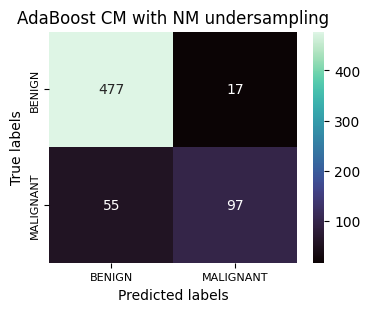

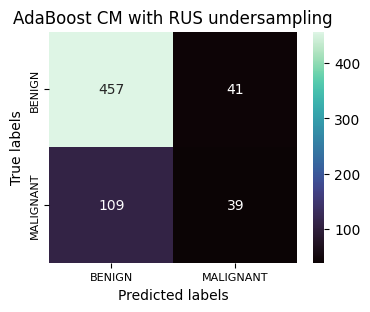

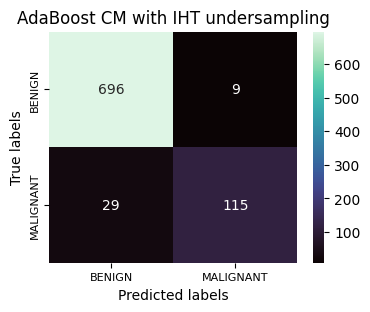

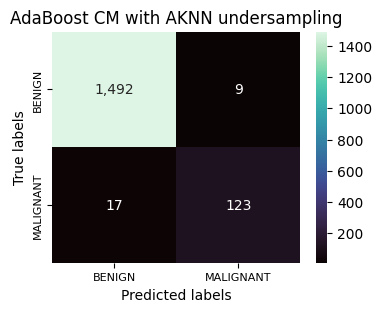

In [168]:
for n, i in enumerate(cmm):
    plot_confusion_matrix(0, 0, t=f'AdaBoost CM with {ust[n]} undersampling', cm=i)

In [169]:
from catboost import CatBoostClassifier as CBC
cmm=[]
drep={}
clf= CBC()
for i in ust :
    clf = clf.fit(x_train[i], y_train[i])
    y_pred = clf.predict(x_test[i])
    cmm.append(confusion_matrix(y_test[i], y_pred))
    print(confusion_matrix(y_test[i], y_pred))
    print(i+" Undersampling :")
    drep[i]= report(y_test[i], y_pred)
    print("\n")


Learning rate set to 0.014651
0:	learn: 0.6686075	total: 7.09ms	remaining: 7.08s
1:	learn: 0.6463851	total: 13.2ms	remaining: 6.59s
2:	learn: 0.6202684	total: 20.4ms	remaining: 6.79s
3:	learn: 0.5960310	total: 26.3ms	remaining: 6.54s
4:	learn: 0.5713953	total: 35.7ms	remaining: 7.09s
5:	learn: 0.5532690	total: 42.7ms	remaining: 7.08s
6:	learn: 0.5343143	total: 51.7ms	remaining: 7.33s
7:	learn: 0.5166214	total: 57.5ms	remaining: 7.13s
8:	learn: 0.4988716	total: 65.3ms	remaining: 7.19s
9:	learn: 0.4845841	total: 72.4ms	remaining: 7.17s
10:	learn: 0.4699364	total: 83.1ms	remaining: 7.47s
11:	learn: 0.4557475	total: 90.6ms	remaining: 7.46s
12:	learn: 0.4406887	total: 98.6ms	remaining: 7.49s
13:	learn: 0.4264743	total: 107ms	remaining: 7.51s
14:	learn: 0.4146527	total: 114ms	remaining: 7.51s
15:	learn: 0.4017222	total: 120ms	remaining: 7.37s
16:	learn: 0.3898096	total: 128ms	remaining: 7.38s
17:	learn: 0.3814746	total: 133ms	remaining: 7.27s
18:	learn: 0.3715405	total: 139ms	remaining: 7.19

In [170]:
for i in drep.keys():
    print(i)
    print(drep[i])
    print()


ENN
   Accuracy  Precision    Recall  F1 score
0  0.980289      0.968  0.916667  0.941634

NM
   Accuracy  Precision    Recall  F1 score
0  0.905573   0.895652  0.677632  0.771536

RUS
   Accuracy  Precision    Recall  F1 score
0  0.772446   0.507692  0.222973  0.309859

IHT
   Accuracy  Precision    Recall  F1 score
0  0.965842   0.925926  0.868056  0.896057

AKNN
   Accuracy  Precision    Recall  F1 score
0  0.987203      0.976  0.871429  0.920755



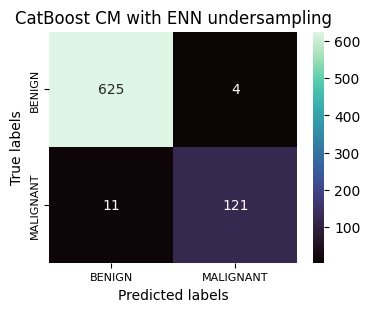

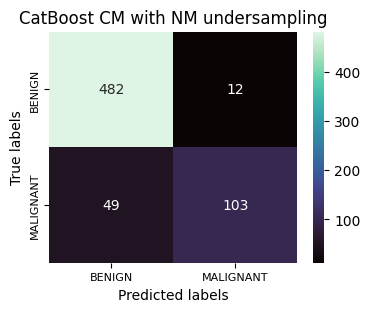

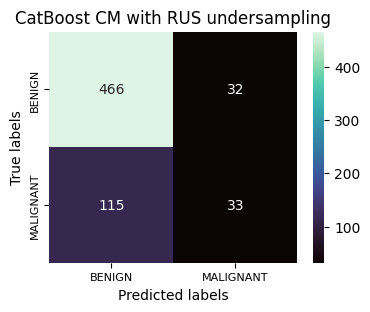

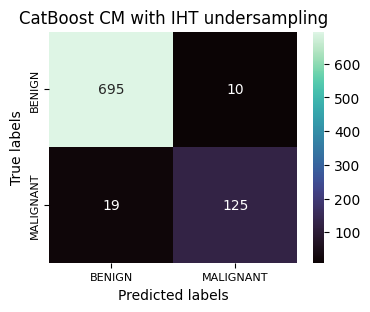

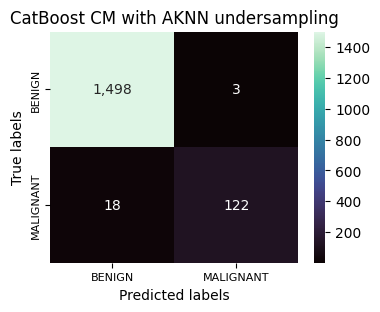

In [171]:
for n, i in enumerate(cmm):
    plot_confusion_matrix(0, 0, t=f'CatBoost CM with {ust[n]} undersampling', cm=i)